In [1]:
#  Project 3: Predict BAC stock price using ML and Macroeconomic variables

# 1) Build Machine learning models to predict BAC's next-day stock price using historical stock data,
# peer financial stocks (JPM, MS, C, WFC), and key macroeconomic variables (VIX,10Y Treasury Yield, Dollar Index, Oil Price, and Gold price).

# 2) Perform feature engineering.

# 3) Apply different ML algorithms such as Decision Tree, Random Forest, Support Vector Machine, and K-Nearest Neighbors (KNN) model. 

# 4) Evaluate the model based on R-squared, RMSE, MSE, and other metrics. 

In [2]:
# Import necessary libraries and packages  
import numpy as np
import pandas as pd
import yfinance as yf


In [3]:
# 'BAC' -> Bank of America (peer fiance stock)
# 'JPM' -> J.P Morgan Chase and Co (peer fiance stock)
# 'MS' -> Morgan Stanley (peer fiance stock)
# 'C' -> Citi Group (peer fiance stock)
# 'WFC' -> Wells Fargo (peer fiance stock)
# 'SPY' -> S&P 500 ETF (Maket Index)
# 'VIX' -> CBOE Volatility index (market fear indicator)
# '^TNX' -> 10 Y US Treasury Yield (Intrest Rate Indicator)
# 'DX-Y.NYB' -> US Dollar Index (strength  of US dollar)
# 'CL=F' -> Crude Oil future (Inflation/energy proxy)
# 'GF=F' -> Gold futures (safe asset)

In [4]:
# Downlaod data from Yahoo Finance 
tickers = ['BAC','JPM','MS','C','WFC','SPY','^VIX','^TNX','DX-Y.NYB','CL=F','GC=F']
data = yf.download(tickers, start = '2002-01-01',end = '2025-01-01')
data = data['Close']
data

C:\Users\226735\AppData\Local\Temp\ipykernel_27804\2422994092.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start = '2002-01-01',end = '2025-01-01')
[*********************100%***********************]  11 of 11 completed


Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.739317,274.352448,21.010000,115.790001,278.899994,18.498014,27.761223,74.910194,11.240906,5.157,22.709999
2002-01-03,17.719593,274.567688,20.370001,116.110001,278.200012,18.991632,28.565605,75.759621,11.282310,5.120,21.340000
2002-01-04,17.995705,279.677063,21.620001,116.330002,278.899994,19.846561,29.983322,76.265358,11.310773,5.141,20.450001
2002-01-07,17.781576,276.396210,21.480000,116.330002,278.600006,19.795670,29.757074,75.727165,11.328883,5.057,21.940001
2002-01-08,17.497009,266.230988,21.250000,116.830002,278.899994,19.643002,29.133699,75.552109,11.284893,5.057,21.830000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,43.843319,69.495293,70.099998,108.260002,2620.000000,238.440521,124.351547,597.729553,70.435799,4.591,14.270000
2024-12-26,44.011265,69.837875,69.620003,108.129997,2638.800049,239.257263,125.300873,597.769348,70.603073,4.579,14.730000
2024-12-27,43.803802,69.495293,70.599998,108.000000,2617.199951,237.318710,124.057938,591.476868,69.963554,4.619,15.950000


In [5]:
# Information of your data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5810 entries, 2002-01-02 to 2024-12-31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BAC       5789 non-null   float64
 1   C         5789 non-null   float64
 2   CL=F      5779 non-null   float64
 3   DX-Y.NYB  5807 non-null   float64
 4   GC=F      5775 non-null   float64
 5   JPM       5789 non-null   float64
 6   MS        5789 non-null   float64
 7   SPY       5789 non-null   float64
 8   WFC       5789 non-null   float64
 9   ^TNX      5783 non-null   float64
 10  ^VIX      5789 non-null   float64
dtypes: float64(11)
memory usage: 544.7 KB


In [6]:
# Statistical Summary of the Data
data.describe()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
count,5789.000000,5789.000000,5779.000000,5807.000000,5775.000000,5789.000000,5789.000000,5789.000000,5789.000000,5783.000000,5789.000000
mean,21.966545,109.354750,66.811741,90.834782,1212.050857,60.420866,37.261583,189.236474,29.382616,3.079020,19.471192
std,9.983902,109.803853,24.071656,10.092435,555.276716,49.185052,23.670933,133.345654,12.933381,1.158701,8.613284
min,2.456464,7.613556,-37.630001,71.330002,278.100006,8.166407,6.416046,50.231041,5.354461,0.499000,9.140000
25%,12.661820,36.421360,48.520000,81.879997,732.649994,24.896479,21.437017,86.793716,18.100876,2.130000,13.610000
50%,22.729923,50.425926,66.230003,90.779999,1253.000000,37.699570,29.106855,133.422577,24.250002,2.979000,17.100000
75%,29.378309,195.833633,84.514999,97.825001,1648.750000,89.550339,42.193565,257.375610,40.755817,4.099500,22.530001
max,46.931263,380.724365,145.289993,120.239998,2788.500000,246.293076,132.112518,602.174133,76.102943,5.428000,82.690002


In [7]:
# How many missing values present in my data
data.isnull().sum()

Ticker
BAC         21
C           21
CL=F        31
DX-Y.NYB     3
GC=F        35
JPM         21
MS          21
SPY         21
WFC         21
^TNX        27
^VIX        21
dtype: int64

In [8]:
# What can be done with the missing data
# 1) Drop the values
# 2) Forward Fill -> Caary forward the last value
# 3) Backward Fill -> Filling the value backward
# 4) Average of the particular stock  
# 5) Interpolation => Linear Interpolation or Cubic Spline Interpolation or Monotone Convex Interpolation

In [9]:
# Eg: Forward Fill (df.ffill())
# EG: Bakcward Fill (df.bfill())

In [10]:
#Applying forward fill
data = data.ffill()
data.head()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.739317,274.352448,21.010000,115.790001,278.899994,18.498014,27.761223,74.910194,11.240906,5.157,22.709999
2002-01-03,17.719593,274.567688,20.370001,116.110001,278.200012,18.991632,28.565605,75.759621,11.282310,5.120,21.340000
2002-01-04,17.995705,279.677063,21.620001,116.330002,278.899994,19.846561,29.983322,76.265358,11.310773,5.141,20.450001
2002-01-07,17.781576,276.396210,21.480000,116.330002,278.600006,19.795670,29.757074,75.727165,11.328883,5.057,21.940001
2002-01-08,17.497009,266.230988,21.250000,116.830002,278.899994,19.643002,29.133699,75.552109,11.284893,5.057,21.830000


In [11]:
data.isnull().sum()

Ticker
BAC         0
C           0
CL=F        0
DX-Y.NYB    0
GC=F        0
JPM         0
MS          0
SPY         0
WFC         0
^TNX        0
^VIX        0
dtype: int64

In [12]:
# Correlation in our data
data.corr()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Ticker,,,,,,,,,,,
BAC,1.000000,0.461779,-0.070637,0.360871,0.071502,0.569557,0.786216,0.544844,0.342323,0.381009,-0.214983
C,0.461779,1.000000,-0.328865,-0.056293,-0.753355,-0.404546,-0.078854,-0.429433,-0.509659,0.716295,-0.165584
CL=F,-0.070637,-0.328865,1.000000,-0.513374,0.436498,0.117551,0.110137,0.140270,0.149889,-0.045080,-0.111997
DX-Y.NYB,0.360871,-0.056293,-0.513374,1.000000,0.165210,0.527508,0.509171,0.542913,0.449883,0.055238,0.003703
GC=F,0.071502,-0.753355,0.436498,0.165210,1.000000,0.787185,0.581200,0.810607,0.694652,-0.526051,-0.022830
JPM,0.569557,-0.404546,0.117551,0.527508,0.787185,1.000000,0.902370,0.987253,0.834764,-0.196493,-0.136455
MS,0.786216,-0.078854,0.110137,0.509171,0.581200,0.902370,1.000000,0.901737,0.660625,0.098139,-0.153446
SPY,0.544844,-0.429433,0.140270,0.542913,0.810607,0.987253,0.901737,1.000000,0.824806,-0.243903,-0.126401
WFC,0.342323,-0.509659,0.149889,0.449883,0.694652,0.834764,0.660625,0.824806,1.000000,-0.322967,-0.333026


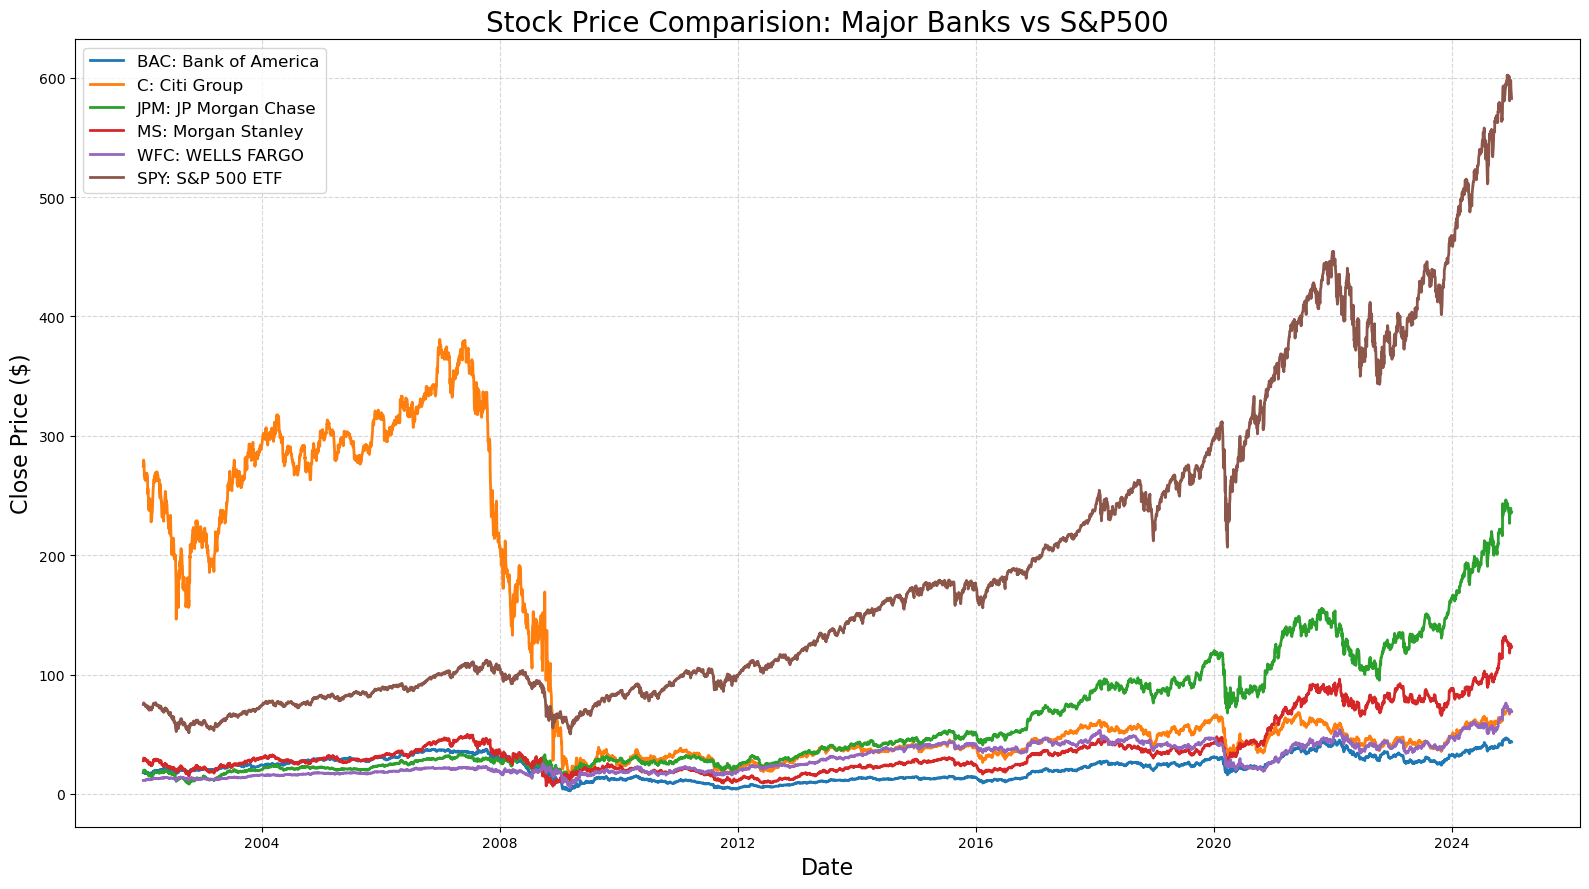

In [13]:
import matplotlib.pyplot as plt

# Create larger Figure
plt.figure(figsize = (16,9))

# Plot each stock
plt.plot(data.index,data['BAC'],label = 'BAC: Bank of America',linewidth = 2)
plt.plot(data.index,data['C'],label = 'C: Citi Group',linewidth = 2)
plt.plot(data.index,data['JPM'],label = 'JPM: JP Morgan Chase',linewidth = 2)
plt.plot(data.index,data['MS'],label = 'MS: Morgan Stanley',linewidth = 2)
plt.plot(data.index,data['WFC'],label = 'WFC: WELLS FARGO',linewidth = 2)
plt.plot(data.index,data['SPY'],label = 'SPY: S&P 500 ETF',linewidth = 2)

# Title, label for X & Y Axis
plt.title('Stock Price Comparision: Major Banks vs S&P500', fontsize = 20)
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Close Price ($)', fontsize = 16)

# Add grid lines for readability
plt.grid(True, linestyle = '--',alpha = 0.5)

# Highlight my Legend
plt.legend(fontsize = 12,loc = 'upper left')

# Show plot
plt.tight_layout()
plt.show()

In [14]:
# Feature Engineering 

df = pd.DataFrame(index = data.index)

# Create lag features 
df['JPM(t-1)'] = data['JPM'].shift(1)
df['BAC(t-1)'] = data['BAC'].shift(1)
df['MS(t-1)'] = data['MS'].shift(1)
df['C(t-1)'] = data['C'].shift(1)
df['WFC(t-1)'] = data['WFC'].shift(1)
df['SPY(t-1)'] = data['SPY'].shift(1)

# Create lag features - Macroeconomic data
df['^VIX(t-1)'] = data['^VIX'].shift(1)
df['10Y_Yield(t-1)'] = data['^TNX'].shift(1)
df['Gold_Futures(t-1)'] = data['GC=F'].shift(1)
df['US_DOLLAR_INDEX(t-1)'] = data['DX-Y.NYB'].shift(1)
df['Crude_Oil_Futures(t-1)'] = data['CL=F'].shift(1)

#Technical Indicators = 5 Day Moving Average, 5 Day Rolling Volatility
df['BAC_MA5'] = data['BAC'].rolling(window = 5).mean().shift(1) 
df['BAC_MA10'] = data['BAC'].rolling(window = 10).mean().shift(1) 
df['BAC_Volatility5'] = data['BAC'].pct_change(5).shift(1) 

# Target Variable
df['Target'] = data['BAC'] # Today's BAC stock price to predict (Y variable)
df

# Drop Nan values
df = df.dropna()
df

,JPM(t-1),BAC(t-1),MS(t-1),C(t-1),WFC(t-1),SPY(t-1),^VIX(t-1),10Y_Yield(t-1),Gold_Futures(t-1),US_DOLLAR_INDEX(t-1),Crude_Oil_Futures(t-1),BAC_MA5,BAC_MA10,BAC_Volatility5,Target
Date,,,,,,,,,,,,,,,
2002-01-16,19.271513,17.313866,29.199299,267.414307,11.727383,74.663818,22.700001,4.831,284.399994,117.290001,18.900000,17.300904,17.523772,-0.010467,17.130724
2002-01-17,18.579433,17.130724,28.199915,262.788910,11.735150,73.153008,23.450001,4.839,287.299988,117.589996,18.860001,17.236100,17.462913,-0.018563,17.220881
2002-01-18,18.752455,17.220881,29.093313,268.382355,11.802427,73.704178,22.250000,4.933,284.399994,117.849998,18.040001,17.186511,17.413041,-0.014194,17.130724
2002-01-21,18.274107,17.130724,28.578476,268.705109,11.742909,73.366997,22.520000,4.888,283.100006,117.510002,18.000000,17.180876,17.326543,-0.001642,17.130724
2002-01-22,18.274107,17.130724,28.578476,268.705109,11.742909,73.366997,22.520000,4.888,283.100006,117.660004,18.000000,17.185384,17.261458,0.001317,17.657608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,234.583115,43.359245,121.797180,68.291359,69.402740,591.158813,16.780001,4.599,2612.300049,108.040001,69.239998,43.465939,44.360982,-0.034748,43.843319
2024-12-26,238.440521,43.843319,124.351547,69.495293,70.435799,597.729553,14.270000,4.591,2620.000000,108.260002,70.099998,43.333559,44.225639,-0.014872,44.011265
2024-12-27,239.257263,44.011265,125.300873,69.837875,70.603073,597.769348,14.730000,4.579,2638.800049,108.129997,69.620003,43.541019,44.074489,0.024138,43.803802


In [15]:
# To train our ML algorithm 
# a) What are our X and Y variables 
# b)Split our data set into training and testing (90:10)
# c) Apply ML Algo
# d)Do Prediction
# e) Evaluate the model based on R-squared, RMSE, MSE
# d) Visulization => Actual vs Forescasted 

In [16]:
# a) What are our X and Y variables 
X = df.drop('Target',axis = 1)
Y = df['Target']

In [17]:
# b)Split our data set into training and testing (90:10)
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test =train_test_split(X,Y,shuffle= False, test_size = 0.10)

In [31]:
# c) Apply ML Algorithm : Decision Tree, K_nearestneighbours, SVR

from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth = 4) # Calling the DT Model
dt_model.fit(X_train,Y_train) # Train my DT model 

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train,Y_train)

from sklearn.neighbors import KNeighborsRegressor
knn_model =  KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(X_train,Y_train)

from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train,Y_train)

SVR()

In [32]:
# d) Do Prediction
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svr_pred = svr_model.predict(X_test)

In [35]:
result = pd.DataFrame(Y_test.index)
result['Actual'] = Y_test.values
result['DT_Prediction'] = dt_pred
result['RF_Prediction'] = rf_pred
result['KNN_Prediction'] = knn_pred
result['SVR_Prediction'] = svr_pred
result

,Date,Actual,DT_Prediction,RF_Prediction,KNN_Prediction,SVR_Prediction
0,2022-09-12,32.761246,32.107639,32.206668,31.498339,33.071029
1,2022-09-13,31.581585,32.107639,32.516651,31.251210,33.379187
2,2022-09-14,31.460833,32.107639,31.738135,31.297350,32.035598
3,2022-09-15,32.055298,32.107639,31.598529,31.289869,32.160237
4,2022-09-16,31.693050,32.107639,32.023990,31.102021,32.111588
...,...,...,...,...,...,...
575,2024-12-24,43.843319,42.941826,42.949578,34.092493,34.885459
576,2024-12-26,44.011265,42.941826,43.117385,34.092493,34.998700
577,2024-12-27,43.803802,42.941826,43.921580,34.092493,34.613459
578,2024-12-30,43.379002,42.941826,43.125821,34.092493,34.873991


In [36]:
# e) Evaluate the model based on R-squared, RMSE, MSE
from sklearn.metrics import r2_score,mean_squared_error
def evaluate_model(y_true,y_pred,model_name):
    r2 = r2_score(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    print("Model Name : ", model_name)
    print("R2 value : ", r2)
    print("MSE : " ,mse)
    print("RMSE : ", rmse)
    print("\n")

evaluate_model(Y_test,dt_pred,"Decesion Tree")    
evaluate_model(Y_test,rf_pred,"Random Forest")  
evaluate_model(Y_test,knn_pred,"K Nearest Neighbors")  
evaluate_model(Y_test,svr_pred,"SVR")  

Model Name :  Decesion Tree
R2 value :  0.9582605360558338
MSE :  1.32321879446769
RMSE :  1.1503124768808213


Model Name :  Random Forest 
R2 value :  0.9844955053655216
MSE :  0.49152137474762053
RMSE :  0.7010858540490035


Model Name :  K Nearest Neighbors
R2 value :  -0.5918554113275662
MSE :  50.46478318843226
RMSE :  7.103856923420703


Model Name :  SVR
R2 value :  0.012073103705865007
MSE :  31.319123755043876
RMSE :  5.596349145205638




<function matplotlib.pyplot.show(close=None, block=None)>

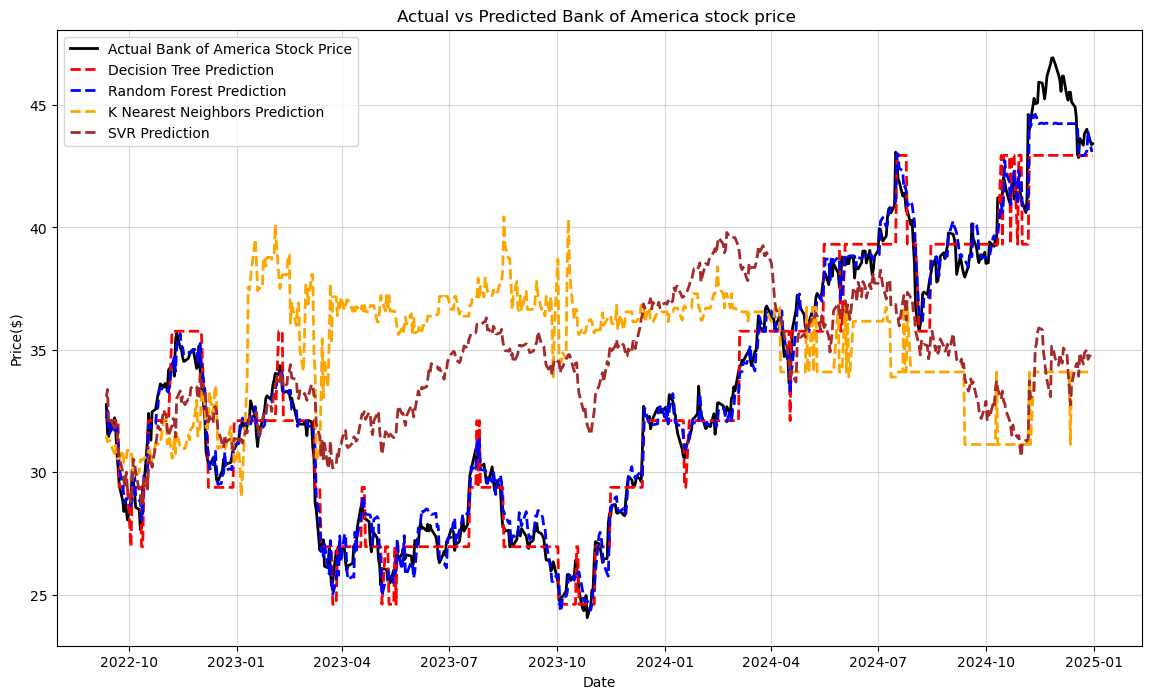

In [42]:
# f) Visulization => Actual vs Forescasted
plt.figure(figsize = (14,8))
plt.plot(Y_test.index,Y_test, label = "Actual Bank of America Stock Price", linewidth = 2, color = 'black')
plt.plot(Y_test.index,dt_pred, label = "Decision Tree Prediction", linewidth = 2, color = 'red',linestyle = '--')
plt.plot(Y_test.index,rf_pred, label = "Random Forest Prediction", linewidth = 2, color = 'blue',linestyle = '--')
plt.plot(Y_test.index,knn_pred, label = "K Nearest Neighbors Prediction", linewidth = 2, color = 'orange',linestyle = '--')
plt.plot(Y_test.index,svr_pred, label = "SVR Prediction", linewidth = 2, color = 'brown',linestyle = '--')


# Highlight title, xlabel, and ylable 
plt.title("Actual vs Predicted Bank of America stock price ")
plt.xlabel('Date')
plt.ylabel("Price($)")
plt.grid(alpha = 0.5)
plt.legend()
plt.show

In [23]:
# Features that are important
importance = dt_model.feature_importances_
features_name = X_train.columns
df_features = pd.DataFrame({"Feature": features_name, "Importance": importance})
df_features = df_features.sort_values(by = 'Importance', ascending  = False)
df_features


,Feature,Importance
1,BAC(t-1),1.0
0,JPM(t-1),0.0
2,MS(t-1),0.0
3,C(t-1),0.0
4,WFC(t-1),0.0
5,SPY(t-1),0.0
6,^VIX(t-1),0.0
7,10Y_Yield(t-1),0.0
8,Gold_Futures(t-1),0.0
9,US_DOLLAR_INDEX(t-1),0.0


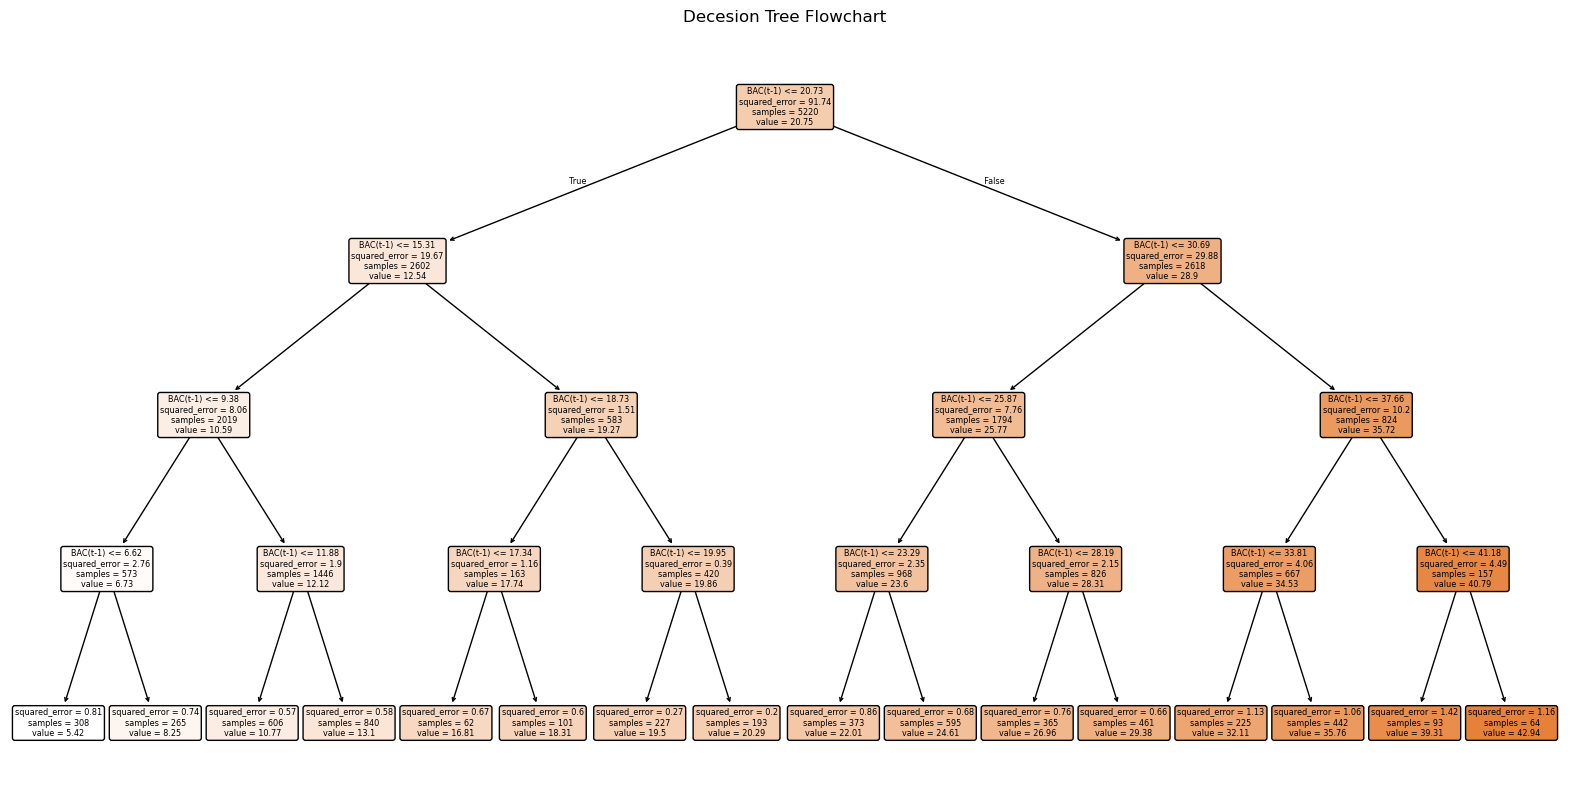

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,10))
plot_tree(dt_model, feature_names = X.columns, filled = True, rounded = True, precision = 2)
plt.title("Decesion Tree Flowchart")
plt.show()